In [1]:
import numpy as np

In [2]:
# simulate randomly rolled die
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

In [3]:
die_roll

1

In [4]:
# seeding reproducible random die rolls
np.random.seed(0)
die_rolls = [np.random.randint(1,7) for _ in range(3)]

In [5]:
assert die_rolls == [5,6,1]

In [6]:
# let's generate a single flip of an unbiased coin
np.random.seed(0)
coin_flip = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [7]:
# generate a sequence of 10 coin flips and then compute 
# the observed frequency of head
np.random.seed(0)
def frequency_head(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0,2) for _ in range(10)]
freq_heads = frequency_head(coin_flips)
print(F"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


In [8]:
# the observed frequency is 0.8 which is quite disproportional to the actual
# probabilty of heads. 10 coin flips with produce such extreme frequencies
# approximately 10% of the time
# Let's see what happens when we flip the coin 1000 times

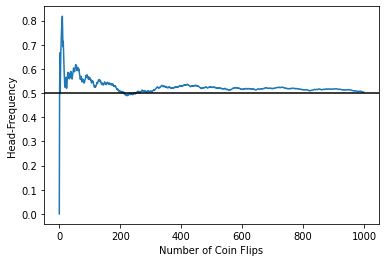

In [9]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(frequency_head(coin_flips))

import matplotlib.pyplot as plt
plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

In [10]:
# the probability of e=heads slowly converges to 0.5. Thus the law 
# of large numbers appears to hold up

### 3.1.1 Analyzing biased coin flip

In [11]:
# we've simulated a sequence of unbiased coin flips, but waht if we wish to
# simulate a coin that falls on heads 70% of the time?
# we can generate the biased output by calling np.random.bionomial(1, 0.7)

In [12]:
np.random.seed(0)
print("Let's flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print(f"{head_count} heads were observed out of {number_coin_flips} biased coin flips")
 

Let's flip the biased coin once.
Biased coin landed on heads.

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


In [13]:
# let's generate a sequence of 1,000 biased coin flips
# we then check if the frequency converges to 0.7
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


In [14]:
# suppose we recompute the frequency of 1000 coin flips five more times
# will all the frequencies be lower than 0.7?
# will certain frequencies hit the exact value of 0.7?
# let's find out by executing np.random.binomial(1000, 0.7) over five looped iterations

np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range (1,6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


In [15]:
# computing confidence intervals 
# using histograms and NumPy arrays

In [26]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]
head_count_array = np.random.binomial(1000, 0.7, 500)

In [31]:
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x:x / 1000, head_count_list))

AssertionError: 

In [32]:
print(frequency_array[:20])

[0.669 0.691 0.743 0.684 0.702 0.699 0.7   0.728 0.711 0.714 0.682 0.7
 0.719 0.722 0.698 0.687 0.697 0.705 0.671 0.739]


In [35]:
# finding the larget and smallest frequncy values
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference accross frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.657
Maximum frequency observed: 0.747
Difference accross frequency range: 0.08999999999999997


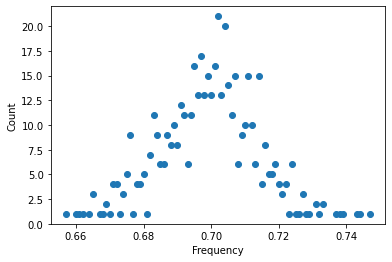

In [38]:
from collections import defaultdict
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1
    
frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

In [39]:
# a scatter plot of 500 head-count frequencies plotted
# against the frequncies plotted agains the frequency
# counts. the frequencies are centered around0.7. Certain 
# proximate frequencings appear as overlappn

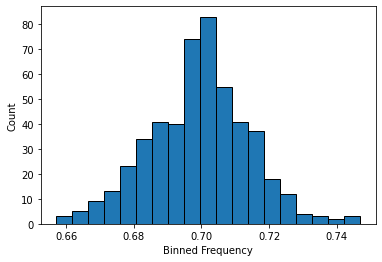

In [40]:
# plot a frequency histogram
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 19


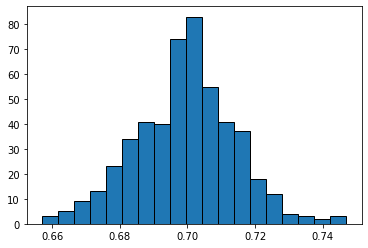

In [41]:
# counting bins in a plotted histogram
counts, _, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
print(f"Number of Bins: {counts.size}")

AssertionError: 

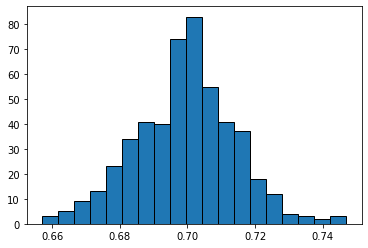

In [42]:
# find the width of bins in a histogram
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [50]:
# getting a bin's frequency and size
def output_bin_coverage(i):
    # a bin at position i contains counts[i] frequencies
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains " f"{count } element{'' if count == 1 else 's'}"))

In [51]:
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.657 - 0.6617368421052632 contains 3 elements
The bin for frequency range 0.6806842105263158 - 0.6854210526315789 contains 34 elements


In [52]:
# finding the index of an array's maximum value
assert counts[counts.argmax()] == counts.max()

In [53]:
# using argmax to return a histogram's peak
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6996315789473684 - 0.7043684210526316 contains 83 elements


### Deriving probabilities from histograms

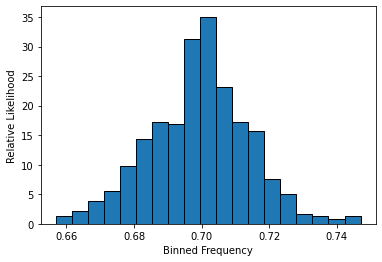

In [54]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()


In [55]:
# the binned counts have now been replaced by relative

In [58]:
# computing the total area under a histogram
likelihoods.argmax()
# assert likelihoods.sum() * bin_width == 1.0

9

In [61]:
# computing the probability of the peak frequencies
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6996315789473684 - 0.7043684210526316 with probability 0.16599999999999612


In [62]:
# increasing the probability of a frequency range
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6948947368421052 - 0.7091052631578948 with probability 0.5059999999999961


In [68]:
# computing a high confidence level
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
            
        area = likelihoods[start_index: end_index + 1].sum() * bin_width
        
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a {100 * area:.2f} % confidence interval"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.671211 - 0.732789 represents a 95.60 % confidence interval


(3, 16)

In [69]:
# shrinking the range of a high confidence interval
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42 % confidence interval


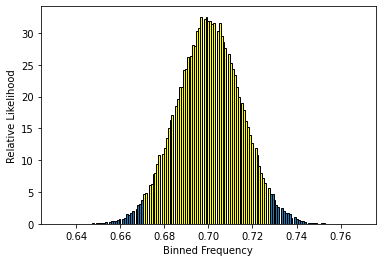

In [70]:
# coloring histogram bars over an interval
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [71]:
# the recomputed histogram resembles a symmetric bell-shaped
# curve. many of its bars have been highlighted ising the 
# set_facecolor method

### Sampling 5 billion flipped coins

The frequency range 0.695769 - 0.703708 represents a 95.06 % confidence interval


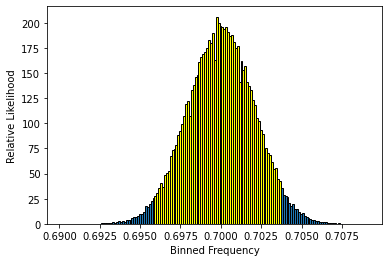

In [74]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [75]:
# a histogram of 100,000 binned frequencies plotted
# against their associated likelihoods, Highlighted bars
# delineat the 95% confidence interval, which represents
# 95% of the histogram's area. 

### Computing a histogram using np.histogram

In [76]:
# we can bypass the vizualization by simply calling np.histogram
np.random.seed(0)
likelihoods, din_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06 % confidence interval


(47, 114)

### Using confidence interval to analyze a biased deck of cards

In [77]:
# suppose you are shown a biased 52-card deck. Each
# card is either red or black, but the color counts 
# aren't equal.

In [79]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

# let's compute the black card count
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

In [83]:
# computing card probabilities using a sample space
def compute_event_probability(red_card_count, black_card_count):
    return red_card_count / ( red_card_count + black_card_count)
weighted_sample_space = {'red_card': red_card_count, 'black_card' : black_card_count }
prob_red = compute_event_probability(lambda x:x == 'red_card', weighted_sample_space)


AttributeError: 'function' object has no attribute 'sum'